In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from joblib import dump, load


In [2]:
df = pd.read_csv('/Users/natalagrunskaa/Desktop/AirlineReviewsToLab2.csv')
df.head()

,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,SeatComfortRating,ServiceRating,TripVerified,ValueRating,WifiRating,AirCompanyUsage,ReviewLen,AirlineNameCode,CabinTypeCode
0,0.000000,0.002362,0.002118,0.0,0,0.004259,0.003912,1,0.004160,0.000000,0.000045,136,0,0
1,0.000000,0.002362,0.002118,0.0,0,0.004259,0.001956,1,0.004160,0.000000,0.000045,68,0,0
2,0.000000,0.000000,0.010591,0.0,1,0.008519,0.007824,1,0.008321,0.000000,0.000045,39,1,0
3,0.000000,0.000000,0.010591,0.0,1,0.008519,0.009780,1,0.008321,0.000000,0.000045,37,1,0
4,0.002716,0.002362,0.002118,0.0,0,0.002130,0.001956,1,0.002080,0.004198,0.000112,123,2,0


In [3]:
df['CLASS'] = pd.qcut(df['AirCompanyUsage'], 5, labels=[0, 1, 2, 3,4])
df

,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,SeatComfortRating,ServiceRating,TripVerified,ValueRating,WifiRating,AirCompanyUsage,ReviewLen,AirlineNameCode,CabinTypeCode,CLASS
0,0.000000,0.002362,0.002118,0.0,0,0.004259,0.003912,1,0.004160,0.000000,0.000045,136,0,0,0
1,0.000000,0.002362,0.002118,0.0,0,0.004259,0.001956,1,0.004160,0.000000,0.000045,68,0,0,0
2,0.000000,0.000000,0.010591,0.0,1,0.008519,0.007824,1,0.008321,0.000000,0.000045,39,1,0,0
3,0.000000,0.000000,0.010591,0.0,1,0.008519,0.009780,1,0.008321,0.000000,0.000045,37,1,0,0
4,0.002716,0.002362,0.002118,0.0,0,0.002130,0.001956,1,0.002080,0.004198,0.000112,123,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18614,0.000000,0.000000,0.004237,0.0,0,0.004259,0.009780,1,0.006241,0.000000,0.003105,178,428,0,2
18615,0.000000,0.009446,0.008473,0.0,1,0.008519,0.007824,1,0.010401,0.000000,0.003105,156,428,0,2
18616,0.000000,0.004723,0.010591,0.0,1,0.004259,0.009780,1,0.010401,0.000000,0.003105,108,428,0,2
18617,0.002716,0.000000,0.002118,0.0,0,0.004259,0.001956,1,0.002080,0.000000,0.003105,71,428,0,2


In [4]:
df.groupby('CLASS')['AirCompanyUsage'].describe()

/var/folders/zf/cjzsfcss5z3g2fhk59zfjx840000gn/T/ipykernel_8353/3834306458.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('CLASS')['AirCompanyUsage'].describe()


,count,mean,std,min,25%,50%,75%,max
CLASS,,,,,,,,
0,3857.0,0.000680,0.000433,0.000022,0.000313,0.000625,0.001095,0.001385
1,3753.0,0.002254,0.000480,0.001497,0.001742,0.002390,0.002658,0.003038
2,3675.0,0.004431,0.000671,0.003105,0.003887,0.004534,0.004937,0.005629
3,3745.0,0.007845,0.001390,0.006143,0.006612,0.007885,0.009203,0.009985
4,3589.0,0.013533,0.001560,0.011883,0.011950,0.013782,0.014229,0.016083


In [5]:
df = df.drop('AirCompanyUsage', axis=1)

In [6]:
x = df.drop('CLASS', axis=1)
y = df['CLASS']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [7]:
knn = GridSearchCV(estimator= KNeighborsClassifier(),
             param_grid={'n_neighbors': [5,7,10], 'algorithm': ['ball_tree', 'kd_tree']}, n_jobs=-1)

knn.fit(x_train, y_train)
knn.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 5}

In [8]:
dump(knn, "knn_model.joblib") 

['knn_model.joblib']

In [9]:
param_grid = {
    'C': [10,1],
    'kernel': ['rbf'],
    'gamma': [10]
}
svm = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1, verbose=3)
svm.fit(x_train, y_train)
svm.best_params_



Fitting 5 folds for each of 2 candidates, totalling 10 fits


{'C': 10, 'gamma': 10, 'kernel': 'rbf'}

In [10]:
dump(svm, "svm_model.joblib")

['svm_model.joblib']

In [11]:
param_grid = {
    'n_estimators' : [10, 50, 100],
    'criterion': ['gini'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5],
}
random_forest = GridSearchCV(estimator=RandomForestClassifier(),  param_grid=param_grid,
                     n_jobs=-1, verbose=3, cv=5)
random_forest.fit(x_train, y_train)
random_forest.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100}

In [12]:
random_forest = random_forest.best_estimator_
dump(random_forest, "random_forest_model.joblib") 

['random_forest_model.joblib']

/Users/natalagrunskaa/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Text(58.222222222222214, 0.5, 'Truth')

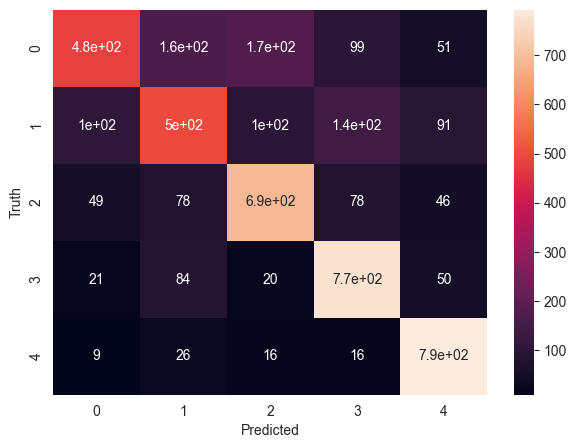

In [13]:
y_pred = knn.predict(x_test.values)
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(matrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.50      0.59       971
           1       0.58      0.53      0.56       933
           2       0.69      0.73      0.71       942
           3       0.70      0.82      0.75       949
           4       0.77      0.92      0.84       860

    accuracy                           0.70      4655
   macro avg       0.69      0.70      0.69      4655
weighted avg       0.69      0.70      0.69      4655


/Users/natalagrunskaa/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(58.222222222222214, 0.5, 'Truth')

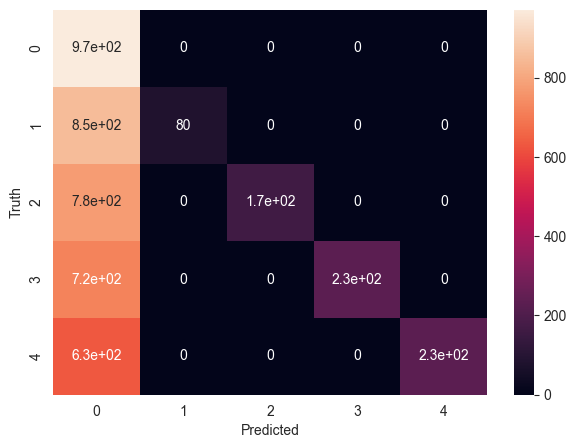

In [15]:
y_pred = svm.predict(x_test.values)
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(matrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.25      1.00      0.39       971
           1       1.00      0.09      0.16       933
           2       1.00      0.18      0.30       942
           3       1.00      0.24      0.39       949
           4       1.00      0.27      0.42       860

    accuracy                           0.36      4655
   macro avg       0.85      0.35      0.33      4655
weighted avg       0.84      0.36      0.33      4655


/Users/natalagrunskaa/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Text(58.222222222222214, 0.5, 'Truth')

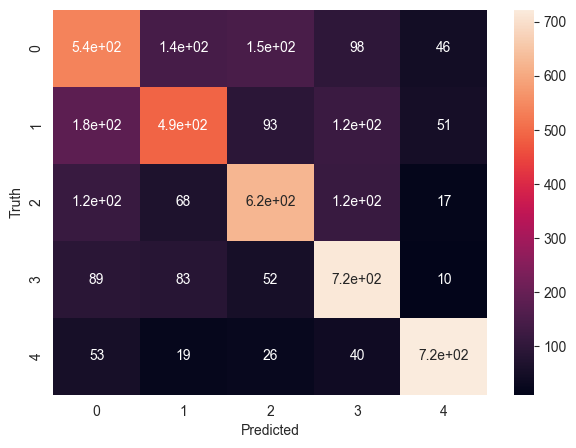

In [17]:
y_pred = random_forest.predict(x_test.values)
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(matrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.55      0.55       971
           1       0.61      0.53      0.56       933
           2       0.66      0.66      0.66       942
           3       0.66      0.75      0.70       949
           4       0.85      0.84      0.85       860

    accuracy                           0.66      4655
   macro avg       0.67      0.67      0.66      4655
weighted avg       0.66      0.66      0.66      4655


Variable: AirlineNameCode      Importance: 0.48
Variable: ReviewLen            Importance: 0.14
Variable: EntertainmentRating  Importance: 0.07
Variable: FoodRating           Importance: 0.05
Variable: SeatComfortRating    Importance: 0.05
Variable: GroundServiceRating  Importance: 0.04
Variable: ServiceRating        Importance: 0.04
Variable: ValueRating          Importance: 0.04
Variable: WifiRating           Importance: 0.04
Variable: CabinTypeCode        Importance: 0.03
Variable: TripVerified         Importance: 0.02
Variable: Recommended          Importance: 0.01
Variable: OverallScore         Importance: 0.0


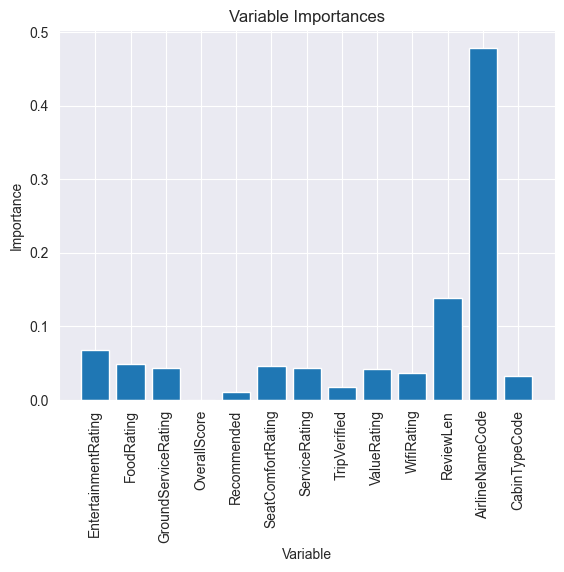

In [19]:
# Get numerical feature importances
importances = random_forest.feature_importances_

# Get the name of the features
feature_list = list(x.columns)

# List of tuples with variable and importance
feature_importance= [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importance = sorted(feature_importance, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importance]

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
plt.show()